# Stock Options Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import yfinance as yf
sns.set_style("whitegrid")
pd.set_option('display.max_columns', None)  # Set to display all columns of dataframes

## Options Data

In [2]:
current_dir = os.getcwd()
# print("Current directory:", current_dir)

# Read the CSV file into a DataFrame
option_data_file = '../data/AMD_OptionPrices.csv'

options_data = pd.read_csv(option_data_file)

In [3]:
options_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889630 entries, 0 to 889629
Data columns (total 38 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   secid             889630 non-null  int64  
 1   date              889630 non-null  object 
 2   symbol            889630 non-null  object 
 3   symbol_flag       889630 non-null  int64  
 4   exdate            889630 non-null  object 
 5   last_date         822401 non-null  object 
 6   cp_flag           889630 non-null  object 
 7   strike_price      889630 non-null  int64  
 8   best_bid          889630 non-null  float64
 9   best_offer        889630 non-null  float64
 10  volume            889630 non-null  int64  
 11  open_interest     889630 non-null  int64  
 12  impl_volatility   735098 non-null  float64
 13  delta             735098 non-null  float64
 14  gamma             735098 non-null  float64
 15  vega              735098 non-null  float64
 16  theta             73

In [4]:
options_data.sample(25)

,secid,date,symbol,symbol_flag,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,vega,theta,optionid,cfadj,am_settlement,contract_size,ss_flag,forward_price,expiry_indicator,root,suffix,cusip,ticker,sic,index_flag,exchange_d,class,issue_type,industry_group,issuer,div_convention,exercise_style,am_set_flag
523946,101121,2022-04-07,AMD 221118C170000,1,2022-11-18,2022-04-07,C,170000,2.28,2.37,13,116,0.482228,0.136653,0.005576,17.836230,-7.120587,145613619,1,0,100,0,NaN,NaN,NaN,NaN,790310,AMD,3674,0,5,NaN,0,NaN,ADVANCED MICRO DEVICES INC.,NaN,A,NaN
342789,101121,2021-11-23,AMD 211126P144000,1,2021-11-26,2021-11-23,P,144000,0.57,0.59,3226,2277,0.470659,-0.167169,0.039133,3.401171,-97.397930,143503058,1,0,100,0,NaN,w,NaN,NaN,790310,AMD,3674,0,5,NaN,0,NaN,ADVANCED MICRO DEVICES INC.,NaN,A,NaN
625014,101121,2022-06-22,AMD 220729C160000,1,2022-07-29,2022-06-10,C,160000,0.00,0.04,0,0,0.724207,0.003598,0.000559,0.287247,-1.031125,147631937,1,0,100,0,NaN,w,NaN,NaN,790310,AMD,3674,0,5,NaN,0,NaN,ADVANCED MICRO DEVICES INC.,NaN,A,NaN
235383,101121,2021-08-16,AMD 210903C155000,1,2021-09-03,2021-08-16,C,155000,0.09,0.10,4,162,0.739490,0.015868,0.002254,0.950819,-7.119983,141686657,1,0,100,0,NaN,w,NaN,NaN,790310,AMD,3674,0,5,NaN,0,NaN,ADVANCED MICRO DEVICES INC.,NaN,A,NaN
843926,101121,2023-01-06,AMD 230127C63000,1,2023-01-27,2023-01-06,C,63000,3.55,3.60,341,437,0.492822,0.581939,0.051634,5.990727,-27.026390,151246655,1,0,100,0,NaN,w,NaN,NaN,790310,AMD,3674,0,5,NaN,0,NaN,ADVANCED MICRO DEVICES INC.,NaN,A,NaN
362281,101121,2021-12-09,AMD 220916P210000,1,2022-09-16,2021-12-03,P,210000,77.45,78.10,0,37,0.495147,-0.773486,0.005153,36.341060,-10.953730,143522275,1,0,100,0,NaN,NaN,NaN,NaN,790310,AMD,3674,0,5,NaN,0,NaN,ADVANCED MICRO DEVICES INC.,NaN,A,NaN
117791,101121,2021-04-21,AMD 211217P110000,1,2021-12-17,2021-03-03,P,110000,30.05,33.25,0,92,0.419942,-0.759738,0.011253,20.589120,-6.435197,137370391,1,0,100,0,NaN,NaN,NaN,NaN,790310,AMD,3674,0,5,NaN,0,NaN,ADVANCED MICRO DEVICES INC.,NaN,A,NaN
715217,101121,2022-09-02,AMD 221021C85000,1,2022-10-21,2022-09-02,C,85000,4.25,4.30,996,3277,0.519401,0.425279,0.025660,11.521050,-23.094750,145321159,1,0,100,0,NaN,NaN,NaN,NaN,790310,AMD,3674,0,5,NaN,0,NaN,ADVANCED MICRO DEVICES INC.,NaN,A,NaN
855208,101121,2023-01-19,AMD 230616P110000,1,2023-06-16,2023-01-18,P,110000,41.80,42.45,0,184,NaN,NaN,NaN,NaN,NaN,146211253,1,0,100,0,NaN,NaN,NaN,NaN,790310,AMD,3674,0,5,NaN,0,NaN,ADVANCED MICRO DEVICES INC.,NaN,A,NaN
525913,101121,2022-04-08,AMD 220715P165000,1,2022-07-15,2022-03-31,P,165000,63.60,64.80,0,288,0.498153,-0.967146,0.003414,3.792621,-3.022416,143654611,1,0,100,0,NaN,NaN,NaN,NaN,790310,AMD,3674,0,5,NaN,0,NaN,ADVANCED MICRO DEVICES INC.,NaN,A,NaN


### Options Data Features

Let's define the features of our data set.

|secid:| Security ID, a unique identifier for each security.|
|---|---|
|date:| Date of the options data.|
|symbol:| Symbol of the security.|
|symbol_flag:| Flag indicating the type of symbol.|
|exdate:| Expiration date of the option.|
|last_date:| Last trading date of the option.|
|cp_flag:| Call (C) or Put (P) option flag.|
|strike_price:| Strike price of the option.|
|best_bid:| Best bid price for the option.|
|best_offer:| Best offer price for the option.|
|volume: Volume| of contracts traded.|
|open_interest:| Open interest for the option.|
|impl_volatility:| Implied volatility of the option.|
|delta:| Delta value of the option.|
|gamma:| Gamma value of the option.|
|vega:| Vega value of the option.|
|theta:| Theta value of the option.|
|optionid:| Option ID, a unique identifier for each option.|
|cfadj:| Adjustment factor for cash flow.|
|am_settlement:| American-style settlement flag.|
|contract_size:| Size of the contract.|
|ss_flag:| Special security flag.|
|expiry_indicator:| Expiry indicator, 'w' meaning weekly|
|cusip:| CUSIP number, a unique identifier for securities in the U.S. and Canada.|
|ticker: | Ticker symbol of the security.|
|sic:| Standard Industrial Classification (SIC) code.|
|index_flag:| Index security flag.|
|exchange_d:| Exchange identifier.|
|issue_type:| Type of issue.|
|industry_group:| Industry group.|
|issuer:| Issuer of the security.|
|exercise_style:| Exercise style of the option (e.g., American or European).|

In [5]:
# Keeping only relevant columns
relevant_columns = ['date', 'symbol', 'exdate', 'cp_flag', 'strike_price',
                   'best_bid', 'best_offer', 'volume', 'open_interest',
                   'impl_volatility', 'delta', 'gamma', 'vega', 'theta', 
                   'optionid', 'contract_size', 'ticker']
relevant_options_data = options_data[relevant_columns].copy()

In [6]:
# Looking for null values in the remaining features
relevant_options_data.isnull().sum()

date                    0
symbol                  0
exdate                  0
cp_flag                 0
strike_price            0
best_bid                0
best_offer              0
volume                  0
open_interest           0
impl_volatility    154532
delta              154532
gamma              154532
vega               154532
theta              154532
optionid                0
contract_size           0
ticker                  0
dtype: int64

#### Drop NA of Implied Volatility and the Greeks
We need more investigation about the Greeks and the implied volatility, so let us just drop the missing values for now and study based on what we have. In the future, when we have better understanding about them, we may interpolate data instead of dropping them, which reduce the size ot the dataset significantly.

Ref: 
1.https://www.investopedia.com/terms/i/iv.asp#:~:text=Volatility%20(IV)%20Works-,Implied%20volatility%20is%20the%20market's%20forecast%20of%20a%20likely%20movement,the%20symbol%20%CF%83%20(sigma).

2. WQU

3. https://www.investopedia.com/trading/getting-to-know-the-greeks/#:~:text=Option%20Greeks%20are%20financial%20metrics,price%20of%20the%20underlying%20asset.


Implied Volatility: this is a significantly important regarding to stock options, which is the key to the options's price and also influence stock price. Other numeric inputs like, stock price, strike level, risk-free rate, and dividend yield, are easily observed in the market.

In [7]:
relevant_options_data.dropna(axis=0,subset=['impl_volatility', 'delta', 'gamma', 'vega', 'theta'],inplace=True)

In [8]:
relevant_options_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 735098 entries, 0 to 889549
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   date             735098 non-null  object 
 1   symbol           735098 non-null  object 
 2   exdate           735098 non-null  object 
 3   cp_flag          735098 non-null  object 
 4   strike_price     735098 non-null  int64  
 5   best_bid         735098 non-null  float64
 6   best_offer       735098 non-null  float64
 7   volume           735098 non-null  int64  
 8   open_interest    735098 non-null  int64  
 9   impl_volatility  735098 non-null  float64
 10  delta            735098 non-null  float64
 11  gamma            735098 non-null  float64
 12  vega             735098 non-null  float64
 13  theta            735098 non-null  float64
 14  optionid         735098 non-null  int64  
 15  contract_size    735098 non-null  int64  
 16  ticker           735098 non-null  object 
d

### Categorical & Numerical Features

In [9]:
# Exploring categorical columns
print("\nUnique values in symbol column:", relevant_options_data['symbol'].unique(), 'Number of unique values in symbol column:', len(relevant_options_data['symbol'].unique()))
print("\nUnique values in cp_flag column:", relevant_options_data['cp_flag'].unique(), 'Number of unique values in symbol column:', len(relevant_options_data['cp_flag'].unique()))
print("\nUnique values in ticker column:", relevant_options_data['ticker'].unique(), 'Number of unique values in symbol column:', len(relevant_options_data['ticker'].unique()))


Unique values in symbol column: ['AMD 210108C100000' 'AMD 210108C101000' 'AMD 210108C102000' ...
 'AMD 230406P40000' 'AMD 230406P45000' 'AMD 230406P50000'] Number of unique values in symbol column: 18660

Unique values in cp_flag column: ['C' 'P'] Number of unique values in symbol column: 2

Unique values in ticker column: ['AMD'] Number of unique values in symbol column: 1


In [10]:
# Exploring numerical columns
print("\nSummary statistics of numerical columns:\n", relevant_options_data.describe())


Summary statistics of numerical columns:
         strike_price       best_bid     best_offer         volume  \
count  735098.000000  735098.000000  735098.000000  735098.000000   
mean   107782.320861      17.550136      18.279313     360.964367   
std     49155.316450      26.726747      27.434994    2157.840185   
min      5000.000000       0.000000       0.010000       0.000000   
25%     75000.000000       0.730000       0.860000       0.000000   
50%     97500.000000       6.200000       6.650000       9.000000   
75%    135000.000000      23.000000      24.150000      87.000000   
max    300000.000000     241.650000     244.850000  211655.000000   

       open_interest  impl_volatility          delta          gamma  \
count  735098.000000    735098.000000  735098.000000  735098.000000   
mean     2266.531514         0.631749      -0.003594       0.012767   
std      5455.451053         0.319834       0.589141       0.015738   
min         0.000000         0.128793      -0.99999

In [11]:
# Converting necessary columns to datetime objects
relevant_options_data['date'] = pd.to_datetime(relevant_options_data['date'])
relevant_options_data['exdate'] = pd.to_datetime(relevant_options_data['exdate'])

In [12]:
relevant_options_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 735098 entries, 0 to 889549
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   date             735098 non-null  datetime64[ns]
 1   symbol           735098 non-null  object        
 2   exdate           735098 non-null  datetime64[ns]
 3   cp_flag          735098 non-null  object        
 4   strike_price     735098 non-null  int64         
 5   best_bid         735098 non-null  float64       
 6   best_offer       735098 non-null  float64       
 7   volume           735098 non-null  int64         
 8   open_interest    735098 non-null  int64         
 9   impl_volatility  735098 non-null  float64       
 10  delta            735098 non-null  float64       
 11  gamma            735098 non-null  float64       
 12  vega             735098 non-null  float64       
 13  theta            735098 non-null  float64       
 14  optionid         735098 n

In [13]:
# We look at the data again
relevant_options_data.head(25)

,date,symbol,exdate,cp_flag,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,vega,theta,optionid,contract_size,ticker
0,2021-01-04,AMD 210108C100000,2021-01-08,C,100000,0.19,0.20,13744,6736,0.542276,0.083361,0.029276,1.481987,-36.679020,137234995,100,AMD
1,2021-01-04,AMD 210108C101000,2021-01-08,C,101000,0.14,0.15,4229,986,0.553831,0.063693,0.023335,1.204094,-30.493600,137273151,100,AMD
2,2021-01-04,AMD 210108C102000,2021-01-08,C,102000,0.10,0.11,3729,2531,0.562234,0.047623,0.018270,0.959573,-24.604400,137273152,100,AMD
3,2021-01-04,AMD 210108C103000,2021-01-08,C,103000,0.07,0.08,688,706,0.569473,0.035131,0.014096,0.750143,-19.474900,137273153,100,AMD
4,2021-01-04,AMD 210108C104000,2021-01-08,C,104000,0.05,0.06,376,1070,0.579418,0.026341,0.010916,0.589210,-15.612930,137273154,100,AMD
5,2021-01-04,AMD 210108C105000,2021-01-08,C,105000,0.03,0.05,1163,1839,0.588415,0.019584,0.008373,0.460541,-12.350510,137234996,100,AMD
6,2021-01-04,AMD 210108C106000,2021-01-08,C,106000,0.02,0.03,311,423,0.585248,0.012912,0.005891,0.322671,-8.596650,137273155,100,AMD
7,2021-01-04,AMD 210108C107000,2021-01-08,C,107000,0.01,0.03,157,246,0.601759,0.010301,0.004710,0.264408,-7.266296,137273156,100,AMD
8,2021-01-04,AMD 210108C108000,2021-01-08,C,108000,0.02,0.03,2476,336,0.652602,0.011728,0.004862,0.296744,-8.820686,137273157,100,AMD
9,2021-01-04,AMD 210108C109000,2021-01-08,C,109000,0.00,0.03,98,139,0.643981,0.007471,0.003321,0.199958,-5.867177,137273158,100,AMD


In [14]:
relevant_options_data.tail(25)

,date,symbol,exdate,cp_flag,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,vega,theta,optionid,contract_size,ticker
889521,2023-02-28,AMD 250117P100000,2025-01-17,P,100000,28.25,29.10,150,1647,0.430136,-0.548930,0.011097,40.353340,-2.756188,149533935,100,AMD
889522,2023-02-28,AMD 250117P105000,2025-01-17,P,105000,31.70,32.65,0,209,0.425744,-0.596226,0.011621,39.069500,-2.560723,149533936,100,AMD
889523,2023-02-28,AMD 250117P110000,2025-01-17,P,110000,35.25,36.40,100,842,0.420511,-0.644429,0.012098,37.060630,-2.290803,149533937,100,AMD
889524,2023-02-28,AMD 250117P115000,2025-01-17,P,115000,38.80,40.60,0,235,0.416591,-0.692955,0.012597,35.026470,-2.052119,149533938,100,AMD
889525,2023-02-28,AMD 250117P120000,2025-01-17,P,120000,43.00,45.40,0,423,0.427425,-0.719964,0.012344,31.940020,-1.934548,149533939,100,AMD
889526,2023-02-28,AMD 250117P125000,2025-01-17,P,125000,47.30,48.90,0,276,0.414444,-0.778258,0.013029,26.251890,-1.458509,149533940,100,AMD
889527,2023-02-28,AMD 250117P130000,2025-01-17,P,130000,50.90,53.85,0,49,0.407684,-0.833179,0.013902,24.277700,-1.254107,149533941,100,AMD
889528,2023-02-28,AMD 250117P135000,2025-01-17,P,135000,56.10,58.85,0,48,0.432490,-0.830507,0.012962,24.962320,-1.362000,149533942,100,AMD
889529,2023-02-28,AMD 250117P140000,2025-01-17,P,140000,59.80,63.25,0,1,0.390796,-0.948040,0.013012,12.809250,0.651057,149533943,100,AMD
889530,2023-02-28,AMD 250117P145000,2025-01-17,P,145000,65.65,68.15,0,1,0.441473,-0.891811,0.013456,17.217570,-1.262957,149533944,100,AMD


In [15]:
# Computing Days to Expiration (dte) and Bid/Ask Spread
relevant_options_data['dte'] = (relevant_options_data['exdate'] - relevant_options_data['date']).dt.days
relevant_options_data['bid_ask_spread'] = relevant_options_data.best_offer - relevant_options_data.best_bid

In [16]:
relevant_options_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 735098 entries, 0 to 889549
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   date             735098 non-null  datetime64[ns]
 1   symbol           735098 non-null  object        
 2   exdate           735098 non-null  datetime64[ns]
 3   cp_flag          735098 non-null  object        
 4   strike_price     735098 non-null  int64         
 5   best_bid         735098 non-null  float64       
 6   best_offer       735098 non-null  float64       
 7   volume           735098 non-null  int64         
 8   open_interest    735098 non-null  int64         
 9   impl_volatility  735098 non-null  float64       
 10  delta            735098 non-null  float64       
 11  gamma            735098 non-null  float64       
 12  vega             735098 non-null  float64       
 13  theta            735098 non-null  float64       
 14  optionid         735098 n

In [17]:
# Sort data by date
relevant_options_data = relevant_options_data.sort_values(by='date')

### Save cleaned options data

In [18]:
# cleaned_option_data_file = '../data/AMD_option_data_2015.1.1_2023.2.28_cleaned.csv'
cleaned_relevant_options_data_file = '../data/1.AMD_OptionPrices_cleaned.csv'

if os.path.exists(cleaned_relevant_options_data_file):
    # If file exists, load it directly
    print('Cleaned options data saved')
else:    
    # Save cleaned options data as csv
    relevant_options_data.to_csv(cleaned_relevant_options_data_file, index=False)
    
print(relevant_options_data.info())

Cleaned options data saved
<class 'pandas.core.frame.DataFrame'>
Index: 735098 entries, 0 to 889549
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   date             735098 non-null  datetime64[ns]
 1   symbol           735098 non-null  object        
 2   exdate           735098 non-null  datetime64[ns]
 3   cp_flag          735098 non-null  object        
 4   strike_price     735098 non-null  int64         
 5   best_bid         735098 non-null  float64       
 6   best_offer       735098 non-null  float64       
 7   volume           735098 non-null  int64         
 8   open_interest    735098 non-null  int64         
 9   impl_volatility  735098 non-null  float64       
 10  delta            735098 non-null  float64       
 11  gamma            735098 non-null  float64       
 12  vega             735098 non-null  float64       
 13  theta            735098 non-null  float64       
 14

In [19]:
# Looking at the span of time our data covers
start_date = relevant_options_data['date'].min()
end_date = relevant_options_data['date'].max()

print(f'start_date: {start_date}, end_date: {end_date}')
(end_date - start_date).days

start_date: 2021-01-04 00:00:00, end_date: 2023-02-28 00:00:00


785

## Stock Data
We need to add the prices of the underlying asset of the option (in this case: the price of AMD stock). To do this we will download the stock data from Yahoo finance that corresponds with the same time span.

In [20]:
tickers = options_data['ticker'].unique()

print(tickers)

# Download historical stock data of the correspoonding ticker
stock_data = {}
for ticker in tickers:
    start_date = relevant_options_data['date'].min() - pd.Timedelta(days=90)
    end_date = relevant_options_data['date'].max() + pd.Timedelta(days=1)

    print(f'Downloading data of {ticker} from start_date: {start_date} to end_date:{end_date}')
    stock_data[ticker] = yf.download(ticker, start=start_date, end=end_date)
    stock_data[ticker]['ticker'] = ticker  # Add a new column 'Ticker' with ticker symbol


stock_data[ticker].info()

['AMD']


[*********************100%%**********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 603 entries, 2020-10-06 to 2023-02-28
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       603 non-null    float64
 1   High       603 non-null    float64
 2   Low        603 non-null    float64
 3   Close      603 non-null    float64
 4   Adj Close  603 non-null    float64
 5   Volume     603 non-null    int64  
 6   ticker     603 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 37.7+ KB


In [21]:
# Combining all stock data into a single DataFrame
merged_stock_data = pd.concat(stock_data.values())
merged_stock_data['date'] = merged_stock_data.index
merged_stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 603 entries, 2020-10-06 to 2023-02-28
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Open       603 non-null    float64       
 1   High       603 non-null    float64       
 2   Low        603 non-null    float64       
 3   Close      603 non-null    float64       
 4   Adj Close  603 non-null    float64       
 5   Volume     603 non-null    int64         
 6   ticker     603 non-null    object        
 7   date       603 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 42.4+ KB


### Clean stock data

In [22]:
# Sorting values by date
merged_stock_data=merged_stock_data.sort_values(by='date')

In [23]:
merged_stock_data.head()

,Open,High,Low,Close,Adj Close,Volume,ticker,date
Date,,,,,,,,
2020-10-06,86.209999,87.250000,83.540001,84.480003,84.480003,52725400,AMD,2020-10-06
2020-10-07,86.099998,87.790001,85.650002,86.690002,86.690002,43045700,AMD,2020-10-07
2020-10-08,88.110001,88.720001,85.949997,86.510002,86.510002,54240700,AMD,2020-10-08
2020-10-09,84.739998,85.750000,82.349998,83.099998,83.099998,80354400,AMD,2020-10-09
2020-10-12,83.650002,85.129997,83.120003,84.290001,84.290001,47669700,AMD,2020-10-12


### Financial Analysis of Stock data

#### Compute daily stock return

In [26]:
stock_data=merged_stock_data.copy()

mapper={'Open':'stock_open', 
        'High':'stock_high', 
        'Low': 'stock_low', 
        'Close':'stock_close', 
        'Adj Close':'stock_price', 
        'Volume':'stock_volume'}
stock_data=stock_data.rename(columns=mapper).copy()

# Calculate daily returns
stock_data['daily_returns'] = stock_data['stock_price'].pct_change()

# Replace NA values with 0
stock_data.fillna(0, inplace=True)

In [27]:
stock_data

,stock_open,stock_high,stock_low,stock_close,stock_price,stock_volume,ticker,date,daily_returns
Date,,,,,,,,,
2020-10-06,86.209999,87.250000,83.540001,84.480003,84.480003,52725400,AMD,2020-10-06,0.000000
2020-10-07,86.099998,87.790001,85.650002,86.690002,86.690002,43045700,AMD,2020-10-07,0.026160
2020-10-08,88.110001,88.720001,85.949997,86.510002,86.510002,54240700,AMD,2020-10-08,-0.002076
2020-10-09,84.739998,85.750000,82.349998,83.099998,83.099998,80354400,AMD,2020-10-09,-0.039417
2020-10-12,83.650002,85.129997,83.120003,84.290001,84.290001,47669700,AMD,2020-10-12,0.014320
...,...,...,...,...,...,...,...,...,...
2023-02-22,76.930000,78.129997,75.919998,76.610001,76.610001,50286800,AMD,2023-02-22,-0.002084
2023-02-23,80.629997,81.790001,77.970001,79.750000,79.750000,76391300,AMD,2023-02-23,0.040987
2023-02-24,77.750000,78.809998,76.940002,78.089996,78.089996,46700000,AMD,2023-02-24,-0.020815


In [28]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 603 entries, 2020-10-06 to 2023-02-28
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   stock_open     603 non-null    float64       
 1   stock_high     603 non-null    float64       
 2   stock_low      603 non-null    float64       
 3   stock_close    603 non-null    float64       
 4   stock_price    603 non-null    float64       
 5   stock_volume   603 non-null    int64         
 6   ticker         603 non-null    object        
 7   date           603 non-null    datetime64[ns]
 8   daily_returns  603 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 47.1+ KB


#### Compute 30 days rolling volatility

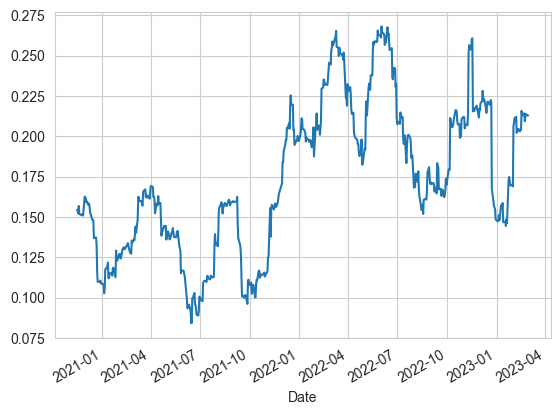

In [29]:
# Define the minimum of periods to consider 
min_periods = 30

# Calculate the volatility. The min_periods parameter ensures that the rolling standard deviation is only calculated when at least 75 non-null data points are in the window.
stock_data['vol_30'] = stock_data['daily_returns'].rolling(min_periods).std()

# Scale the rolling standard deviation by the square root of the number of periods (days) to annualize it
stock_data['vol_30'] = stock_data['vol_30'] * np.sqrt(min_periods) 

# Remark: vol is the standard deviation; sqrt was used, so the annualized parameter should also  be sqrt_ed

# Plot the volatility
stock_data['vol_30'].plot()

# Show the plot
plt.show()

#### Compute 60 days rolling volatility

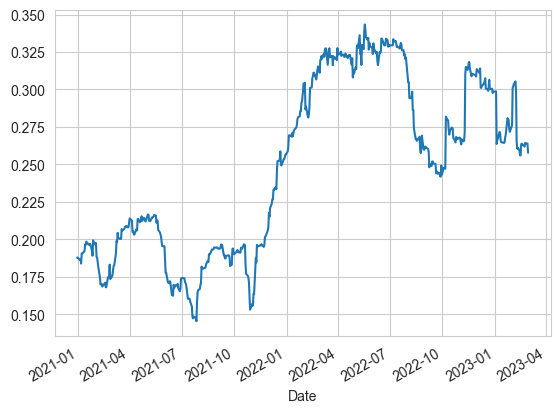

In [30]:
# Define the minimum of periods to consider 
min_periods = 60

# Calculate the volatility. The min_periods parameter ensures that the rolling standard deviation is only calculated when at least 75 non-null data points are in the window.
stock_data['vol_60'] = stock_data['daily_returns'].rolling(min_periods).std()

# Scale the rolling standard deviation by the square root of the number of periods (days) to annualize it
stock_data['vol_60'] = stock_data['vol_60'] * np.sqrt(min_periods) 

# Remark: vol is the standard deviation; sqrt was used, so the annualized parameter should also  be sqrt_ed

# Plot the volatility
stock_data['vol_60'].plot()

# Show the plot
plt.show()

#### Compute 90 days rolling volatility

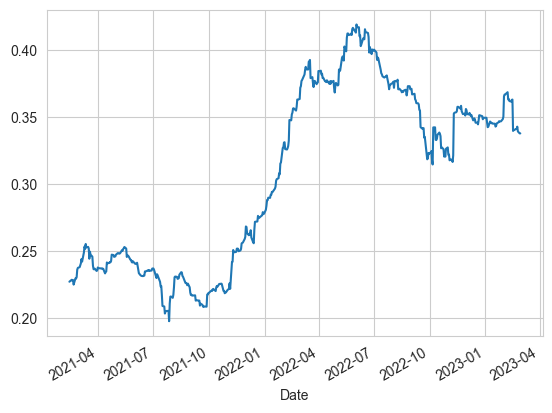

In [31]:
# Define the minimum of periods to consider 
min_periods = 90

# Calculate the volatility. The min_periods parameter ensures that the rolling standard deviation is only calculated when at least 75 non-null data points are in the window.
stock_data['vol_90'] = stock_data['daily_returns'].rolling(min_periods).std()

# Scale the rolling standard deviation by the square root of the number of periods (days) to annualize it
stock_data['vol_90'] = stock_data['vol_90'] * np.sqrt(min_periods) 

# Remark: vol is the standard deviation; sqrt was used, so the annualized parameter should also  be sqrt_ed

# Plot the volatility
stock_data['vol_90'].plot()

# Show the plot
plt.show()

In [32]:
# Replace NA values with 0
stock_data.fillna(0, inplace=True)

In [33]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 603 entries, 2020-10-06 to 2023-02-28
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   stock_open     603 non-null    float64       
 1   stock_high     603 non-null    float64       
 2   stock_low      603 non-null    float64       
 3   stock_close    603 non-null    float64       
 4   stock_price    603 non-null    float64       
 5   stock_volume   603 non-null    int64         
 6   ticker         603 non-null    object        
 7   date           603 non-null    datetime64[ns]
 8   daily_returns  603 non-null    float64       
 9   vol_30         603 non-null    float64       
 10  vol_60         603 non-null    float64       
 11  vol_90         603 non-null    float64       
dtypes: datetime64[ns](1), float64(9), int64(1), object(1)
memory usage: 61.2+ KB


In [34]:
cutoff_date = '2021-01-04'

In [35]:
stock_data = stock_data[stock_data.index >= cutoff_date]

In [37]:
stock_data

,stock_open,stock_high,stock_low,stock_close,stock_price,stock_volume,ticker,date,daily_returns,vol_30,vol_60,vol_90
Date,,,,,,,,,,,,
2021-01-04,92.110001,96.059998,90.919998,92.300003,92.300003,51802600,AMD,2021-01-04,0.006433,0.108051,0.186191,0.000000
2021-01-05,92.099998,93.209999,91.410004,92.769997,92.769997,34208000,AMD,2021-01-05,0.005092,0.102737,0.186196,0.000000
2021-01-06,91.620003,92.279999,89.459999,90.330002,90.330002,51911700,AMD,2021-01-06,-0.026302,0.106025,0.183714,0.000000
2021-01-07,91.330002,95.510002,91.199997,95.160004,95.160004,42897200,AMD,2021-01-07,0.053471,0.117649,0.190502,0.000000
2021-01-08,95.980003,96.400002,93.269997,94.580002,94.580002,39816400,AMD,2021-01-08,-0.006095,0.117887,0.190440,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-22,76.930000,78.129997,75.919998,76.610001,76.610001,50286800,AMD,2023-02-22,-0.002084,0.209347,0.261806,0.340946
2023-02-23,80.629997,81.790001,77.970001,79.750000,79.750000,76391300,AMD,2023-02-23,0.040987,0.212328,0.264289,0.342652
2023-02-24,77.750000,78.809998,76.940002,78.089996,78.089996,46700000,AMD,2023-02-24,-0.020815,0.213782,0.263795,0.339081


### Save Cleaned Stock data

In [38]:
# cleaned_stock_data_file = '../data/AMD_stock_data_2015.1.1_2023.2.28_cleaned.csv'
cleaned_stock_data_file = '../data/2.AMD_stock_prices_cleaned.csv'

if os.path.exists(cleaned_stock_data_file):
    # If file exists, load it directly
    print('Cleaned stock data saved')
else:    
    # Save cleaned options data as csv
    stock_data.to_csv(cleaned_stock_data_file, index=False)
    
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 542 entries, 2021-01-04 to 2023-02-28
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   stock_open     542 non-null    float64       
 1   stock_high     542 non-null    float64       
 2   stock_low      542 non-null    float64       
 3   stock_close    542 non-null    float64       
 4   stock_price    542 non-null    float64       
 5   stock_volume   542 non-null    int64         
 6   ticker         542 non-null    object        
 7   date           542 non-null    datetime64[ns]
 8   daily_returns  542 non-null    float64       
 9   vol_30         542 non-null    float64       
 10  vol_60         542 non-null    float64       
 11  vol_90         542 non-null    float64       
dtypes: datetime64[ns](1), float64(9), int64(1), object(1)
memory usage: 55.0+ KB


## Risk-Free Rate

We download 10-year Treasury bond from Yahoo Finance to represent risk-free rate

In [40]:
def get_risk_free_rate(start_date, end_date):
    """
    Fetches historical data for the 10-year Treasury bond from Yahoo Finance and computes the risk-free rate.
    Returns the risk-free rate as a percentage.
    """
    # Ticker symbol for the 10-year Treasury bond
    ticker_symbol = "^TNX"

    # Fetch historical data
    treasury_bond_data = yf.download(ticker_symbol, 
                                     start=start_date, 
                                     end=end_date)
    treasury_bond_data['date'] = treasury_bond_data.index
    treasury_bond_data=treasury_bond_data[['date', 'Adj Close']]
    treasury_bond_data=treasury_bond_data.rename(columns={'Adj Close':'risk_free_rate'}).copy()

    return treasury_bond_data


start_date = stock_data['date'].min()
end_date = stock_data['date'].max() + pd.Timedelta(days=1)

treasury_bond_data = get_risk_free_rate(start_date, end_date)


print(treasury_bond_data.describe())

[*********************100%%**********************]  1 of 1 completed

                                date  risk_free_rate
count                            542      542.000000
mean   2022-01-29 15:56:27.453874432        2.301026
min              2021-01-04 00:00:00        0.917000
25%              2021-07-19 06:00:00        1.494000
50%              2022-01-29 12:00:00        1.791500
75%              2022-08-14 06:00:00        3.119750
max              2023-02-28 00:00:00        4.234000
std                              NaN        0.963000


In [41]:
treasury_bond_data

,date,risk_free_rate
Date,,
2021-01-04,2021-01-04,0.917
2021-01-05,2021-01-05,0.955
2021-01-06,2021-01-06,1.042
2021-01-07,2021-01-07,1.071
2021-01-08,2021-01-08,1.105
...,...,...
2023-02-22,2023-02-22,3.923
2023-02-23,2023-02-23,3.879
2023-02-24,2023-02-24,3.949


In [42]:
treasury_bond_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 542 entries, 2021-01-04 to 2023-02-28
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            542 non-null    datetime64[ns]
 1   risk_free_rate  542 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.7 KB


### Save Risk-Free Rate Data

In [43]:
TNX_data_file = '../data/3.TNX21_23.csv'
treasury_bond_data.to_csv(TNX_data_file, index=False)

## Merge Risk-Free Rate to stock data

In [44]:
# Convert 'date' column to datetime type in the DataFrame
stock_data['date'] = pd.to_datetime(stock_data['date'])
treasury_bond_data['date'] = pd.to_datetime(treasury_bond_data['date'])

# Merge options data and stock data based on common columns (ticker and date)
stock_and_bond_data = pd.merge(stock_data, treasury_bond_data, on=['date'], how='left')

# Print or further process the combined data
stock_and_bond_data

C:\Users\uriah\AppData\Local\Temp\ipykernel_21216\1752721391.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['date'] = pd.to_datetime(stock_data['date'])


,stock_open,stock_high,stock_low,stock_close,stock_price,stock_volume,ticker,date,daily_returns,vol_30,vol_60,vol_90,risk_free_rate
0,92.110001,96.059998,90.919998,92.300003,92.300003,51802600,AMD,2021-01-04,0.006433,0.108051,0.186191,0.000000,0.917
1,92.099998,93.209999,91.410004,92.769997,92.769997,34208000,AMD,2021-01-05,0.005092,0.102737,0.186196,0.000000,0.955
2,91.620003,92.279999,89.459999,90.330002,90.330002,51911700,AMD,2021-01-06,-0.026302,0.106025,0.183714,0.000000,1.042
3,91.330002,95.510002,91.199997,95.160004,95.160004,42897200,AMD,2021-01-07,0.053471,0.117649,0.190502,0.000000,1.071
4,95.980003,96.400002,93.269997,94.580002,94.580002,39816400,AMD,2021-01-08,-0.006095,0.117887,0.190440,0.000000,1.105
...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,76.930000,78.129997,75.919998,76.610001,76.610001,50286800,AMD,2023-02-22,-0.002084,0.209347,0.261806,0.340946,3.923
538,80.629997,81.790001,77.970001,79.750000,79.750000,76391300,AMD,2023-02-23,0.040987,0.212328,0.264289,0.342652,3.879
539,77.750000,78.809998,76.940002,78.089996,78.089996,46700000,AMD,2023-02-24,-0.020815,0.213782,0.263795,0.339081,3.949
540,79.639999,80.120003,78.529999,78.769997,78.769997,45617300,AMD,2023-02-27,0.008708,0.212789,0.263888,0.337587,3.922


In [45]:
# Keep relevant columns of stock and bond data
columns_to_keep = ['date','ticker','stock_volume','stock_price','daily_returns','vol_30','vol_60','vol_90','risk_free_rate']

stock_and_bond_data = stock_and_bond_data[columns_to_keep]

In [46]:
stock_and_bond_data

,date,ticker,stock_volume,stock_price,daily_returns,vol_30,vol_60,vol_90,risk_free_rate
0,2021-01-04,AMD,51802600,92.300003,0.006433,0.108051,0.186191,0.000000,0.917
1,2021-01-05,AMD,34208000,92.769997,0.005092,0.102737,0.186196,0.000000,0.955
2,2021-01-06,AMD,51911700,90.330002,-0.026302,0.106025,0.183714,0.000000,1.042
3,2021-01-07,AMD,42897200,95.160004,0.053471,0.117649,0.190502,0.000000,1.071
4,2021-01-08,AMD,39816400,94.580002,-0.006095,0.117887,0.190440,0.000000,1.105
...,...,...,...,...,...,...,...,...,...
537,2023-02-22,AMD,50286800,76.610001,-0.002084,0.209347,0.261806,0.340946,3.923
538,2023-02-23,AMD,76391300,79.750000,0.040987,0.212328,0.264289,0.342652,3.879
539,2023-02-24,AMD,46700000,78.089996,-0.020815,0.213782,0.263795,0.339081,3.949
540,2023-02-27,AMD,45617300,78.769997,0.008708,0.212789,0.263888,0.337587,3.922


### Combine relevant options data and stock & bond data

In [47]:
# Merge options data and stock data based on common columns (ticker and date)
df = pd.merge(relevant_options_data, stock_and_bond_data, on=['ticker', 'date'], how='left')

# Print or further process the combined data
df

,date,symbol,exdate,cp_flag,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,vega,theta,optionid,contract_size,ticker,dte,bid_ask_spread,stock_volume,stock_price,daily_returns,vol_30,vol_60,vol_90,risk_free_rate
0,2021-01-04,AMD 210108C100000,2021-01-08,C,100000,0.19,0.20,13744,6736,0.542276,0.083361,0.029276,1.481987,-36.679020,137234995,100,AMD,4,0.01,51802600,92.300003,0.006433,0.108051,0.186191,0.000000,0.917
1,2021-01-04,AMD 210618P77500,2021-06-18,P,77500,6.10,6.25,20,3662,0.539774,-0.253139,0.009548,19.855680,-11.799940,135275250,100,AMD,165,0.15,51802600,92.300003,0.006433,0.108051,0.186191,0.000000,0.917
2,2021-01-04,AMD 210618P75000,2021-06-18,P,75000,5.25,5.40,31,3940,0.543015,-0.225831,0.008918,18.644170,-11.156300,131958036,100,AMD,165,0.15,51802600,92.300003,0.006433,0.108051,0.186191,0.000000,0.917
3,2021-01-04,AMD 210618P72500,2021-06-18,P,72500,4.40,4.60,92,3187,0.543308,-0.198984,0.008278,17.322050,-10.369120,135275249,100,AMD,165,0.20,51802600,92.300003,0.006433,0.108051,0.186191,0.000000,0.917
4,2021-01-04,AMD 210618P70000,2021-06-18,P,70000,3.80,3.90,403,15729,0.549348,-0.174899,0.007558,15.975150,-9.681901,131958035,100,AMD,165,0.10,51802600,92.300003,0.006433,0.108051,0.186191,0.000000,0.917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735093,2023-02-28,AMD 230324C99000,2023-03-24,C,99000,0.13,0.15,2,26,0.483421,0.037535,0.008406,1.651868,-6.180347,152414025,100,AMD,24,0.02,44220100,78.580002,-0.002412,0.212890,0.257681,0.337616,3.916
735094,2023-02-28,AMD 230324P25000,2023-03-24,P,25000,0.00,0.05,0,1,1.700915,-0.002178,0.000200,0.138658,-1.781842,152414032,100,AMD,24,0.05,44220100,78.580002,-0.002412,0.212890,0.257681,0.337616,3.916
735095,2023-02-28,AMD 230324P30000,2023-03-24,P,30000,0.00,0.05,0,0,1.442407,-0.002581,0.000276,0.161516,-1.760608,152414033,100,AMD,24,0.05,44220100,78.580002,-0.002412,0.212890,0.257681,0.337616,3.916
735096,2023-02-28,AMD 230324P40000,2023-03-24,P,40000,0.00,0.06,0,1,1.056748,-0.004168,0.000578,0.248724,-1.979684,152414035,100,AMD,24,0.06,44220100,78.580002,-0.002412,0.212890,0.257681,0.337616,3.916


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735098 entries, 0 to 735097
Data columns (total 26 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   date             735098 non-null  datetime64[ns]
 1   symbol           735098 non-null  object        
 2   exdate           735098 non-null  datetime64[ns]
 3   cp_flag          735098 non-null  object        
 4   strike_price     735098 non-null  int64         
 5   best_bid         735098 non-null  float64       
 6   best_offer       735098 non-null  float64       
 7   volume           735098 non-null  int64         
 8   open_interest    735098 non-null  int64         
 9   impl_volatility  735098 non-null  float64       
 10  delta            735098 non-null  float64       
 11  gamma            735098 non-null  float64       
 12  vega             735098 non-null  float64       
 13  theta            735098 non-null  float64       
 14  optionid         735

## Save Final CSV file

In [49]:
# cleaned_option_stock_data_file = '../data/AMD_option_stock_data_2015.1.1_2023.2.28_cleaned.csv'
cleaned_option_stock_data_file = '../data/4.AMD_option_stock_data_cleaned.csv'


if os.path.exists(cleaned_option_stock_data_file):
    # If file exists, load it directly
    print('Cleaned option and stock data saved')
else:    
    print('Saving cleaned option and stock data')
    # Save cleaned options data as csv
    df.to_csv(cleaned_option_stock_data_file, index=False)
    
print(df.info())

Saving cleaned option and stock data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735098 entries, 0 to 735097
Data columns (total 26 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   date             735098 non-null  datetime64[ns]
 1   symbol           735098 non-null  object        
 2   exdate           735098 non-null  datetime64[ns]
 3   cp_flag          735098 non-null  object        
 4   strike_price     735098 non-null  int64         
 5   best_bid         735098 non-null  float64       
 6   best_offer       735098 non-null  float64       
 7   volume           735098 non-null  int64         
 8   open_interest    735098 non-null  int64         
 9   impl_volatility  735098 non-null  float64       
 10  delta            735098 non-null  float64       
 11  gamma            735098 non-null  float64       
 12  vega             735098 non-null  float64       
 13  theta            735098 non-null  flo